The equation of the motion of the quadrotor is as follows

\begin{equation}
\begin{aligned}
\ddot{\phi} & = \dot{\theta}\dot{\psi}\left(\frac{I_y-I_z}{I_x}\right) - \frac{J_r}{I_x}\dot{\theta}\Omega + \frac{l}{I_x}U_2\\
\ddot{\theta} & = \dot{\phi}\dot{\psi}\left(\frac{I_z-I_x}{I_y}\right) + \frac{J_r}{I_y}\dot{\phi}\Omega + \frac{l}{I_y}U_3\\
\ddot{\psi} & = \dot{\phi}\dot{\theta}\left(\frac{I_x-I_y}{I_z}\right) + \frac{1}{I_z}U_4\\
\ddot{z} & = -g + (cos \phi cos \theta)\frac{1}{m}U_1 \\
\ddot{x} & = (\cos \phi \sin \theta \cos \psi + \sin \phi \sin \psi)\frac{1}{m}U_1 \\
\ddot{y} & = (\cos \phi \sin \theta \sin \psi - \sin \phi \cos \psi)\frac{1}{m}U_1 \\
\end{aligned}
\end{equation}

And the forces given the rotor rotation speeds are

\begin{equation}
\begin{aligned}
U_1 &= b(\Omega_1^2 + \Omega_2^2 + \Omega_3^2 + \Omega_4^2) \\
U_2 &= b(\Omega_4^2 - \Omega_2^2) \\
U_3 &= b(\Omega_3^2 + \Omega_1^2) \\
U_4 &= d(\Omega_2^2 + \Omega_4^2 - \Omega_3^2 - \Omega_4^2) \\
\Omega &= \Omega_2 + \Omega_4 - \Omega_1 - \Omega_3
\end{aligned}
\end{equation}




In [22]:
import numpy as np

I_x = 0.004 # KgM^2
I_y = 0.004 # KgM^2
I_z = 0.008 # KgM^2
J_r = 0.0003 # KgM^2
m = 0.500 # Kg
l = 0.25  # m
b = 3e-5  # Ns^2
d = 3e-7  # NMs^2
g = 9.81  #Ms^2


U_1_eq = 0.5*g  # N

# The paremeters are from DUAL NEURAL NETWORK FOR ADAPTIVE SLIDING MODE CONTROL OF QUADROTOR HELICOPTER STABILIZATION

def quad(state, t):
    dot_phi, dot_theta, dot_psi, phi, theta, psi, dot_z, dot_x, dot_y, z, x, y  = state
    
    # control start #
    U_1 = U_1_eq
    U_2 = -0.01
    U_3 = 0
    U_4 = 0
    Omega = 0
    # control ends #
    
    ddot_phi   = dot_theta * dot_psi   * (I_y-I_z)/I_x - J_r/I_x*dot_theta* Omega + l/I_x*U_2
    ddot_theta = dot_phi   * dot_psi   * (I_z-I_x)/I_y + J_r/I_y*dot_phi*   Omega + l/I_y*U_3
    ddot_psi   = dot_phi   * dot_theta * (I_x-I_y)/I_z                            + 1/I_z*U_4
    
    ddot_z = -g + np.cos(phi)*np.cos(theta)/m*U_1
    ddot_x = (np.cos(phi)*np.sin(theta)*np.cos(psi)+np.sin(phi)*np.sin(psi))/m*U_1
    ddot_y = (np.cos(phi)*np.sin(theta)*np.sin(psi)-np.sin(phi)*np.cos(psi))/m*U_1
    
    d_state_dt = [ddot_phi, ddot_theta, ddot_psi, dot_phi, dot_theta, dot_psi, ddot_z, ddot_x, ddot_y, dot_z, dot_x, dot_y]
    
    return d_state_dt


state0 = [0,0,0,0,0,0,0,0,0,0,0,0]

t = np.linspace(0, 10, 101)



from scipy.integrate import odeint
sol = odeint(quad, state0, t)


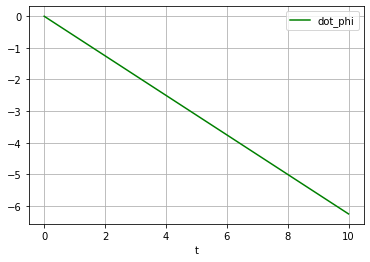

In [24]:
import matplotlib.pyplot as plt

#plt.plot(t, sol[:, 6], 'b', label='dot_z')
plt.plot(t, sol[:, 0], 'g', label='dot_phi')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
